In [1]:
import pandas as pd
import numpy as np
from random import gauss
from pandas.plotting import autocorrelation_plot
import warnings
import itertools
from random import random

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# import matplotlib as mpl
import seaborn as sns     

In [2]:
df1 = pd.read_csv("/Users/chenyian/DS_mini_project/drive-download-20240302T104351Z-001/merged_2025-01.csv")
df2 = pd.read_csv("/Users/chenyian/DS_mini_project/drive-download-20240302T104351Z-001/merged_2025-02.csv")
df3 = pd.read_csv("/Users/chenyian/DS_mini_project/drive-download-20240302T104351Z-001/merged_2025-03.csv")
df4 = pd.read_csv("/Users/chenyian/DS_mini_project/drive-download-20240302T104351Z-001/merged_2025-04.csv")
df5 = pd.read_csv("/Users/chenyian/DS_mini_project/drive-download-20240302T104351Z-001/merged_2025-05.csv")
df6 = pd.read_csv("/Users/chenyian/DS_mini_project/drive-download-20240302T104351Z-001/merged_2025-06.csv")
df7 = pd.read_csv("/Users/chenyian/DS_mini_project/drive-download-20240302T104351Z-001/merged_2025-07.csv")

January mid-price

In [19]:
df1['datetime'] = pd.to_datetime(df1['Day'] + ' ' + df1['Time'])
df1.head()

,Day,Time,Bid1,Bid2,Ask1,Ask2,Mid_Price,Total_volume,Bid_ask_spread,Order_imbalance,datetime
0,2025/1/2,7:30:00,"[1.0, 6]","[0, 0]","[0, 0]","[0, 0]",0.50,6,-1.00,1.00,2025-01-02 07:30:00
1,2025/1/2,7:30:01,"[27.0, 20]","[1.0, 12]","[798.4, 5]","[0, 0]",412.70,37,771.40,0.73,2025-01-02 07:30:01
2,2025/1/2,7:30:02,"[261.75, 8]","[21.0, 13]","[306.46, 13]","[403.57, 7]",284.11,41,44.71,0.02,2025-01-02 07:30:02
3,2025/1/2,7:30:03,"[262.75, 48]","[261.0, 8]","[292.56, 16]","[294.59, 32]",277.66,104,29.81,0.08,2025-01-02 07:30:03
4,2025/1/2,7:30:04,"[264.0, 36]","[261.0, 6]","[287.45, 20]","[288.1, 21]",275.73,83,23.45,0.01,2025-01-02 07:30:04


In [28]:
df_12 = df1[df1['Day']== '2025/1/2']

df_12.head()

,Day,Time,Bid1,Bid2,Ask1,Ask2,Mid_Price,Total_volume,Bid_ask_spread,Order_imbalance,datetime
0,2025/1/2,7:30:00,"[1.0, 6]","[0, 0]","[0, 0]","[0, 0]",0.50,6,-1.00,1.00,2025-01-02 07:30:00
1,2025/1/2,7:30:01,"[27.0, 20]","[1.0, 12]","[798.4, 5]","[0, 0]",412.70,37,771.40,0.73,2025-01-02 07:30:01
2,2025/1/2,7:30:02,"[261.75, 8]","[21.0, 13]","[306.46, 13]","[403.57, 7]",284.11,41,44.71,0.02,2025-01-02 07:30:02
3,2025/1/2,7:30:03,"[262.75, 48]","[261.0, 8]","[292.56, 16]","[294.59, 32]",277.66,104,29.81,0.08,2025-01-02 07:30:03
4,2025/1/2,7:30:04,"[264.0, 36]","[261.0, 6]","[287.45, 20]","[288.1, 21]",275.73,83,23.45,0.01,2025-01-02 07:30:04


In [32]:
df_12_mp = df_12[['datetime', 'Mid_Price']].set_index('datetime')

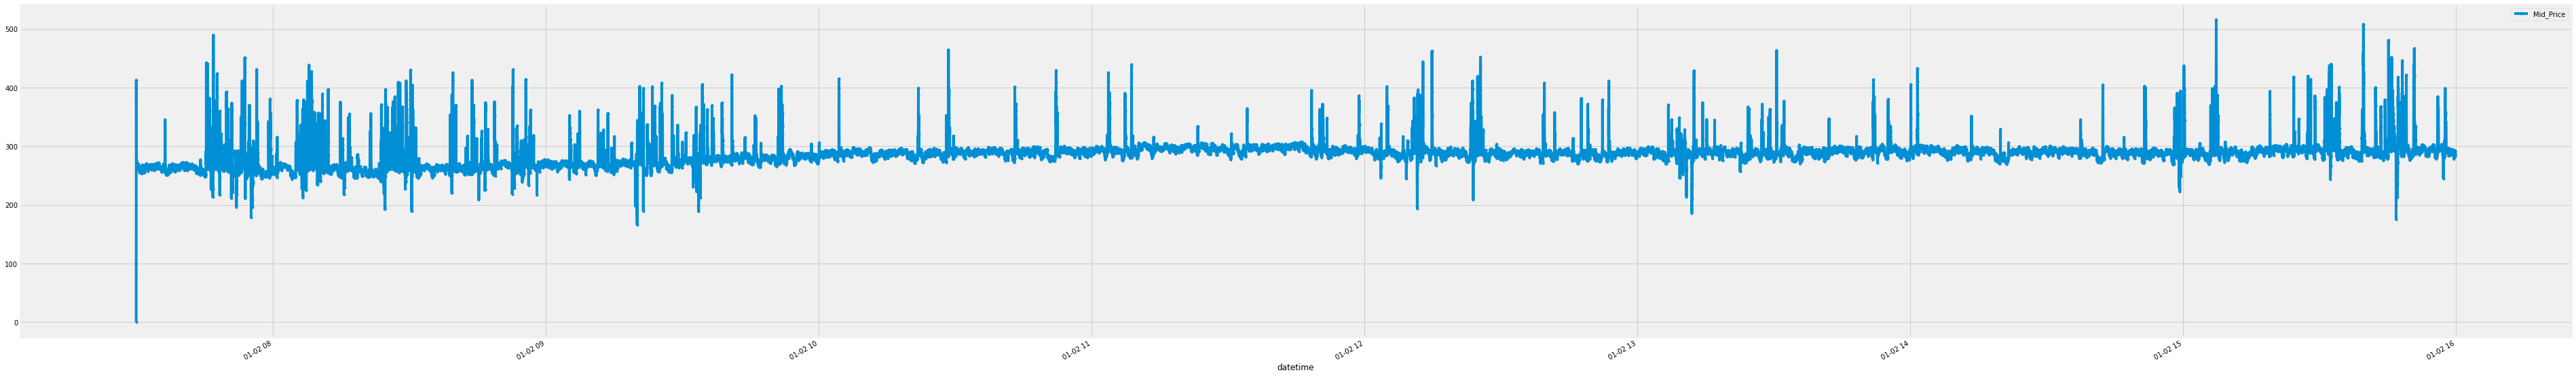

In [33]:
import matplotlib.pyplot as plt

df_12_mp.plot(grid=True, marker=".", figsize=(60, 10))
plt.show()

intraday mid-prices looks very stationary

Applying decompostion

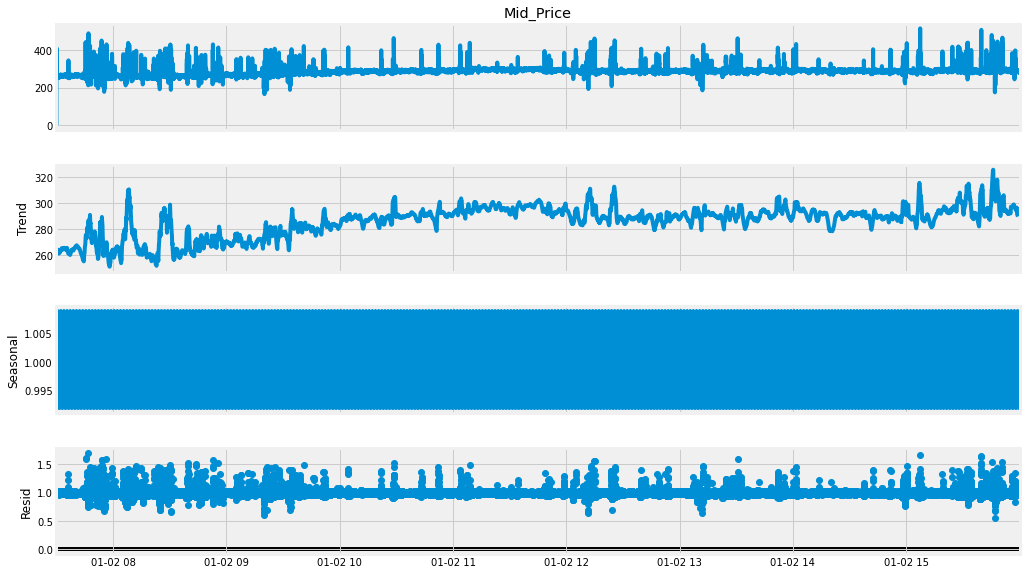

In [36]:
decomposition = sm.tsa.seasonal_decompose(df_12_mp['Mid_Price'], period = 100, model='multiplicative') 
fig = decomposition.plot()
fig.set_size_inches((16, 9))
plt.show()

It shows no seasonal effects within a day. Based on the plots, the small non-stationarity is probably caused by the Trend.

In [ ]:
plot_acf(df_12_mp['Mid_Price'], lags = 50)
plt.show()

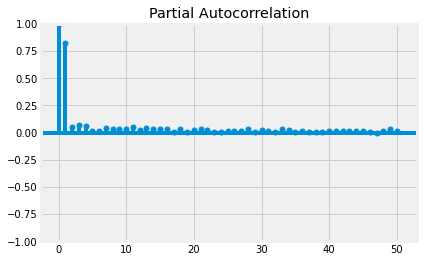

In [44]:
plot_pacf(df_12_mp['Mid_Price'], lags = 50)
plt.show()


Mostly stationary, except for at the beginning

In [45]:
# Augmented Dickey-Fuller

result = adfuller(df_12_mp['Mid_Price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -11.661418
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [51]:
result = adfuller(decomposition.trend.dropna()[10:-10])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.880491
p-value: 0.000000


In [54]:
df_13 = df1[df1['Day']== '2025/1/3']

df_13.head()

,Day,Time,Bid1,Bid2,Ask1,Ask2,Mid_Price,Total_volume,Bid_ask_spread,Order_imbalance,datetime
30599,2025/1/3,7:30:00,"[0, 0]","[0, 0]","[281.0, 2]","[354.0, 3]",140.50,5,281.0,-1.00,2025-01-03 07:30:00
30600,2025/1/3,7:30:01,"[0, 0]","[0, 0]","[354.0, 3]","[0, 0]",177.00,3,354.0,-1.00,2025-01-03 07:30:01
30601,2025/1/3,7:30:02,"[173.5, 12]","[0, 0]","[354.0, 6]","[0, 0]",263.75,18,180.5,0.33,2025-01-03 07:30:02
30602,2025/1/3,7:30:03,"[57.0, 6]","[0, 0]","[354.0, 3]","[0, 0]",205.50,9,297.0,0.33,2025-01-03 07:30:03
30603,2025/1/3,7:30:04,"[58.5, 4]","[57.0, 12]","[354.0, 6]","[0, 0]",206.25,22,295.5,0.45,2025-01-03 07:30:04


In [55]:
df_13_mp = df_13[['datetime', 'Mid_Price']].set_index('datetime')

In [56]:
result = adfuller(df_13_mp['Mid_Price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.876948
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [58]:
#Monthly

df1_mp = df1['Mid_Price']

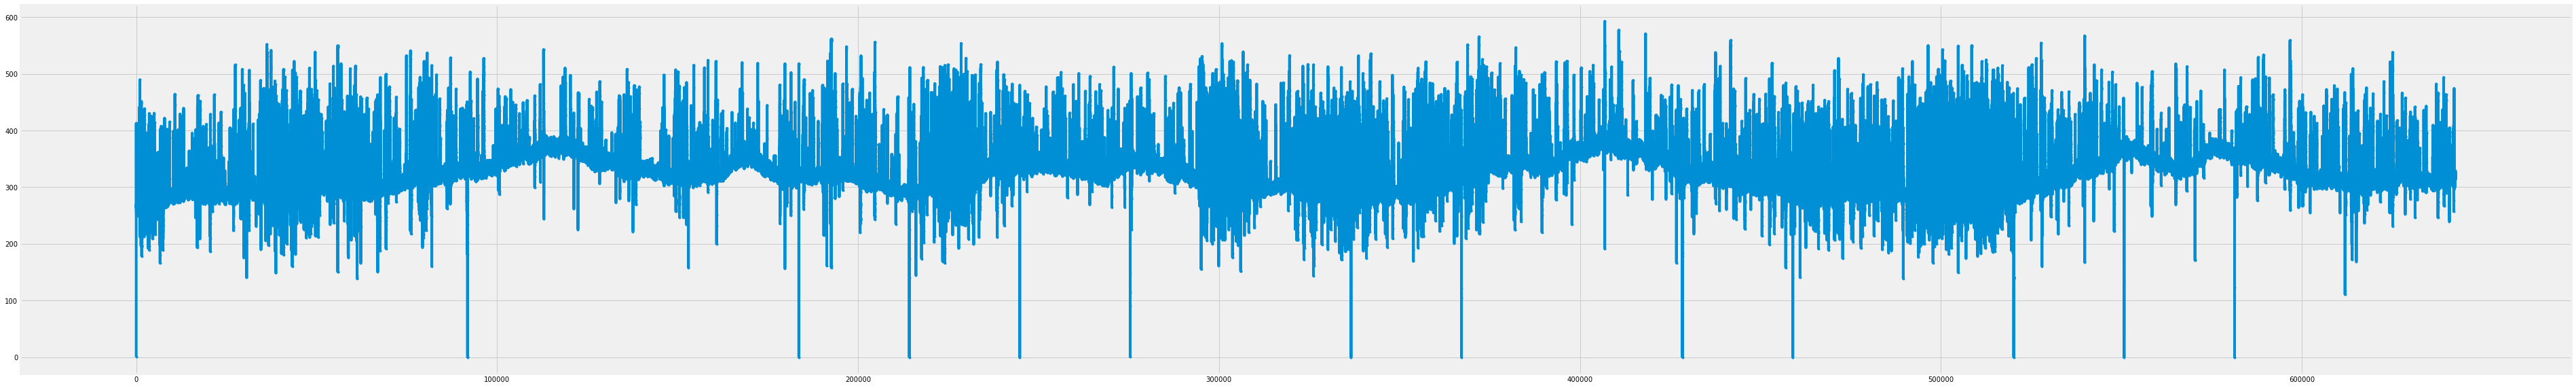

In [60]:
df1_mp.plot(grid=True, marker=".", figsize=(60, 10))
plt.show()

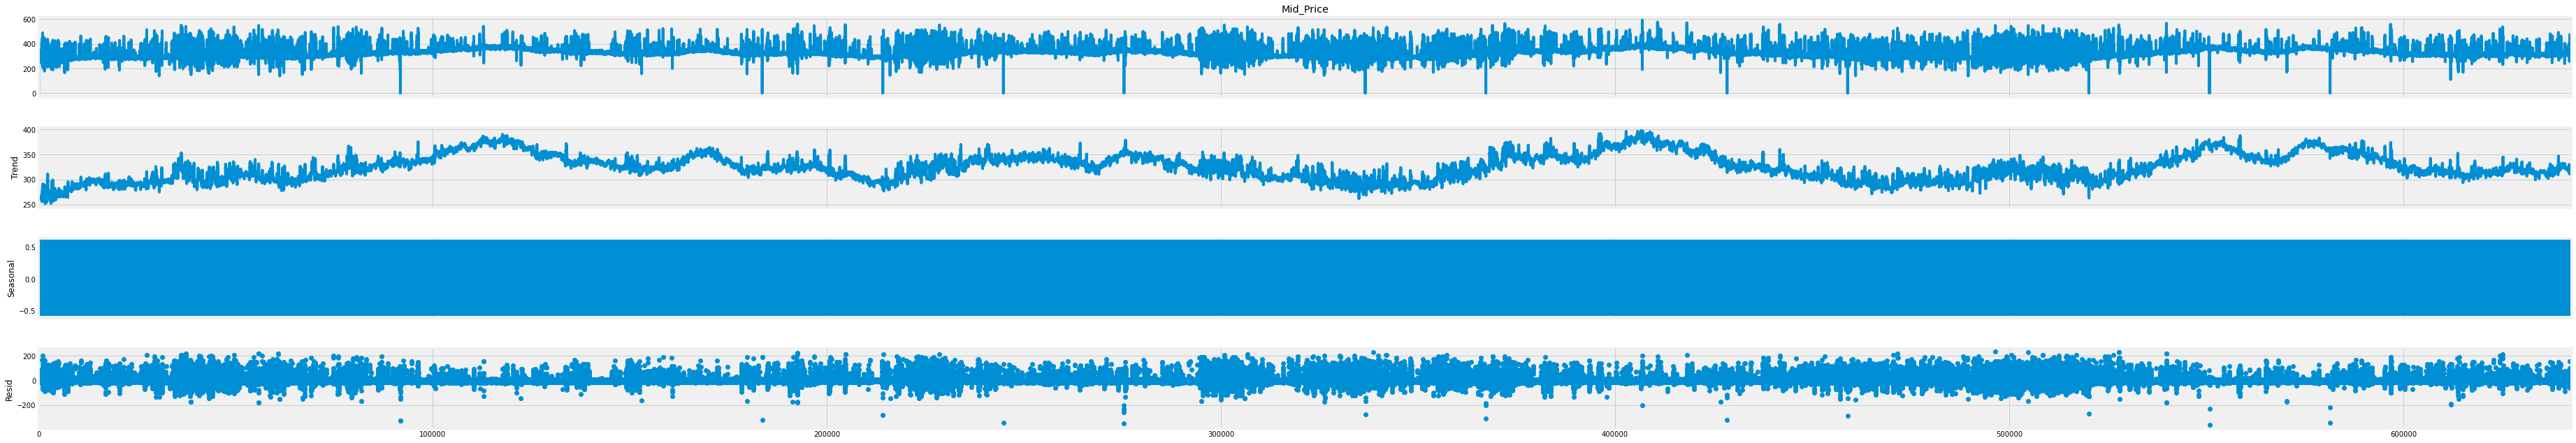

In [64]:
decomposition = sm.tsa.seasonal_decompose(df1_mp, period = 100) 
fig = decomposition.plot()
fig.set_size_inches((60, 10))
plt.show()

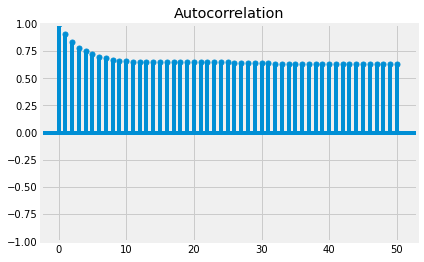

In [66]:
plot_acf(df1_mp, lags = 50)
plt.show()

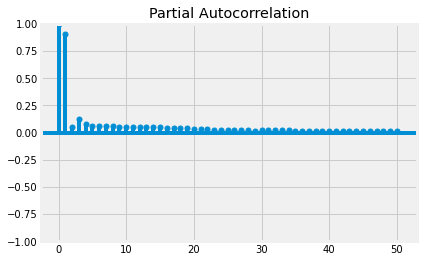

In [67]:
plot_pacf(df1_mp, lags = 50)
plt.show()

In [68]:
result = adfuller(df1_mp)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.500820
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


Mid-prices in January are stationary

In [69]:
result = adfuller(df2['Mid_Price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -18.015294
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


Smoothing 

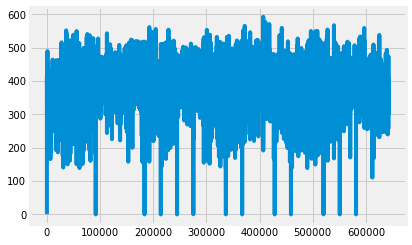

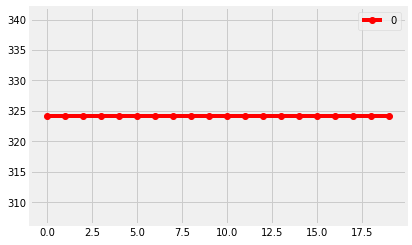

In [85]:
# test three different values of alpha
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt


df1_mp.plot()

fit1 = SimpleExpSmoothing(np.asarray(df1_mp)).fit(smoothing_level=0.9, optimized=False)
forecast1 = fit1.forecast(20)
forecast1 = pd.DataFrame(forecast1)
forecast1.plot(marker='o', color='red', legend=True)

plt.show()
